<a href="https://colab.research.google.com/github/Zahid8/Pytorch-Geometric/blob/main/Graph_Neural_Networks_with_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun 13 15:40:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

1.11.0+cu113


In [ ]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html


In [ ]:
import os

com_wget = "sudo wget " +"https://github.com/prasmussen/gdrive/releases/download/2.1.1/gdrive_2.1.1_linux_386.tar.gz"
com_unzip = "sudo tar -xzf gdrive_2.1.1_linux_386.tar.gz"
com_permission = "sudo chmod +x gdrive"
com_install_executor = "sudo install gdrive /usr/local/bin/gdrive"

os.system(com_wget)
os.system(com_unzip)
os.system(com_permission)
os.system(com_install_executor)

0

In [ ]:
!sudo gdrive list

Id                                  Name                    Type   Size      Created
10XzbooTnjys8yxcduTJpZaaDL6PbmLcb   slide3.xml              bin    2.2 KB    2022-02-10 08:02:09
1g1uruVRN_Cyg2gW_Zd7z9ZtlxdowfD7B   presentation.xml.rels   bin    4.7 KB    2022-02-10 08:02:15
10SIKJo-eOXyGcB7RWBIRoNf3eQrP8a32   image7.png              bin    15.4 KB   2022-02-10 08:01:54
1taMBfzvCb7trwKucsHKCn9fpi2fuI766   image9.png              bin    29.4 KB   2022-02-10 08:01:53
10lW8cXEKLpMVJgS0Y-O2B8zHQPAY5ppZ   slideLayout2.xml.rels   bin    311.0 B   2022-02-10 08:05:32
1EHTArHKKbCfwkEZtl9qJKnz417lxZqDF   slideLayout5.xml.rels   bin    311.0 B   2022-02-10 08:05:32
1ddA7Fpp6ZRU6iydDROzH1geOSHAGHZPv   thumbnail.jpeg          bin    12.3 KB   2022-02-10 07:54:23
1o1wtfnz-hYjhQn6leMCYrxEPsn3dl5Kt   slide1.xml              bin    1.7 KB    2022-02-10 08:02:01
1Wp7MyPa_ZCAcp9qIg6HxJcey7qyAd-y-   slide21.xml             bin    3.8 KB    2022-02-10 08:02:08
1TGcOOih1_L9FglInuigenFaOr2DnNPLv   slide7

In [ ]:
!gdrive download 184NTddlP4LCoYNihyhZ6TnaEeRTpGfy8


File 'playlist_data.csv' already exists, use --force to overwrite or --skip to skip


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/playlist_data.csv")
df.head(10)

,user_key,playlist_key,song_key,artistname,trackname,playlistname,weighted_tags
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,"[('pop', 100), ('dance', 50), ('female vocalis..."
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,"[('soul', 100), ('female', 50), ('pop', 50), (..."
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 61), ('roc..."
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 70), ('roc..."
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,"[('pop', 86), ('female vocalists', 72), ('00s'..."
5,0,0,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,"[('female vocalists', 100), ('pop', 72), ('par..."
6,0,0,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 100)]"
7,0,0,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 55), ('sou..."
8,0,0,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,"[('pop', 100), ('perlast', 50)]"
9,0,0,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 58), ('roc..."


In [ ]:
from ast import literal_eval
tag_df = df[['weighted_tags']]
arr=[]
for index, row in tag_df.iterrows():
    a = literal_eval(row[0])
    temp = []
    for i in range(len(a)):
        temp.append(a[i][0])
    arr.append(temp)
print(arr)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tag_df['unweighted_tags']=arr
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tag_df = tag_df.drop('weighted_tags', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
tag_df.head(10)

,unweighted_tags
0,"[pop, dance, female vocalists, remix, party, s..."
1,"[soul, female, pop, female vocalists, american..."
2,"[pop, female vocalists, rock, soul, slow rock,..."
3,"[pop, female vocalists, rock, 00s, soul, favor..."
4,"[pop, female vocalists, 00s, rock, 5 of 10 sta..."
5,"[female vocalists, pop, party, folk-rock, pop ..."
6,"[pop, female vocalists]"
7,"[pop, female vocalists, soul, rnb, rock, dance..."
8,"[pop, perlast]"
9,"[pop, female vocalists, rock, soul, pop rock, ..."


In [ ]:
result = pd.concat([df, tag_df], axis=1, join='inner')

In [ ]:
result

,user_key,playlist_key,song_key,artistname,trackname,playlistname,weighted_tags,unweighted_tags
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,"[('pop', 100), ('dance', 50), ('female vocalis...","[pop, dance, female vocalists, remix, party, s..."
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,"[('soul', 100), ('female', 50), ('pop', 50), (...","[soul, female, pop, female vocalists, american..."
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 61), ('roc...","[pop, female vocalists, rock, soul, slow rock,..."
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,"[('pop', 100), ('female vocalists', 70), ('roc...","[pop, female vocalists, rock, 00s, soul, favor..."
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,"[('pop', 86), ('female vocalists', 72), ('00s'...","[pop, female vocalists, 00s, rock, 5 of 10 sta..."
...,...,...,...,...,...,...,...,...
71395,319,3423,23109,Leonardo De Lozanne,Si Me Dejas Ahora,Various Artists – Un Tributo,"[('sad', 100), ('covers', 100), ('design', 100)]","[sad, covers, design]"
71396,319,3423,25451,Maldita Vecindad,"Lo Pasado, Pasado",Various Artists – Un Tributo,"[('favorite', 100)]",[favorite]
71397,319,3423,27905,Molotov,Payaso,Various Artists – Un Tributo,"[('cover', 100), ('drunk', 100), ('disco', 50)...","[cover, drunk, disco, hip-hop, funk, covers, c..."
71398,319,3423,30866,Pastilla,Lágrimas,Various Artists – Un Tributo,"[('covers', 100), ('rock en espanol', 100), ('...","[covers, rock en espanol, design]"


In [ ]:
df_new = result.drop('unweighted_tags', 1).join(result.unweighted_tags.str.join('|').str.get_dummies())

df_new = df_new.drop('weighted_tags', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_new.head(10)

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

x = df_new.to_numpy()
x.shape # [num_nodes x num_features]

(71400, 3108)

## Dont Run the next cell...It concatenates all the songs in a plylist to one. Not useful when taking song as nodes.

In [ ]:

#df1 = df_new.groupby(["playlist_key"], as_index=False).sum()
#df1.head(10)

,playlist_key,user_key,song_key,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,00's,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,38110,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,133397,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,562125,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,3,0,1008523,0,0,0,0,0,0,0,...,1,0,2,0,1,0,0,0,1,0
4,4,0,302815,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,0,597130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,395681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,708509,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,862781,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,9,0,1113777,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 = df_new[df_new['user_key'] == 0]
#df2 = df1[df1['user_key'] == 0]

In [ ]:
df2.head(15)

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Taking Songs as nodes and song tags as node and node features for each playlist of each user.

In [ ]:
test_df = df2[df2['playlist_key'] == 1]
test_df.head(20)

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
16,0,1,9774,David Guetta,Gettin' Over You (feat. Fergie & LMFAO),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,1,9800,David Guetta,Memories (feat. Kid Cudi),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,9807,David Guetta,One Love (feat. Estelle),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,9818,David Guetta,Sexy Bitch (feat. Akon) - Featuring Akon;explicit,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,9831,David Guetta,Titanium - feat. Sia,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,9834,David Guetta,Turn Me On - feat. Nicki Minaj,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,1,9836,David Guetta,When Love Takes Over (feat. Kelly Rowland),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,9837,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,1,9839,David Guetta,Who's That Chick ? (feat. Rihanna) [Single Ver...,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,1,9843,David Guetta,Without You - feat. Usher,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
udf2 = df2[df2['playlist_key'] == 0]

In [ ]:
udf2.head(20)

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for x in range(len(df2)):
    globals()['gdf' + str(x)] = df2[df2['playlist_key'] == x]
    
    

In [ ]:
gdf0

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gdf1

,user_key,playlist_key,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
16,0,1,9774,David Guetta,Gettin' Over You (feat. Fergie & LMFAO),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,1,9800,David Guetta,Memories (feat. Kid Cudi),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,9807,David Guetta,One Love (feat. Estelle),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,9818,David Guetta,Sexy Bitch (feat. Akon) - Featuring Akon;explicit,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,9831,David Guetta,Titanium - feat. Sia,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,9834,David Guetta,Turn Me On - feat. Nicki Minaj,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,1,9836,David Guetta,When Love Takes Over (feat. Kelly Rowland),David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,9837,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,1,9839,David Guetta,Who's That Chick ? (feat. Rihanna) [Single Ver...,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,1,9843,David Guetta,Without You - feat. Usher,David Guetta,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#for testing purposes I can drop user_key as I know they are all of same user and can also drop playlist_key because dataframe name is a indicator of the playlist key
for x in range(len(df2)):
    globals()['gdf' + str(x)] = globals()['gdf' + str(x)].drop(['user_key','playlist_key'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
gdf0

,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Testing for one particular playlist of one particular user

In [ ]:
gdf0

,song_key,artistname,trackname,playlistname,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,1683,Anastacia,Club Megamix,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1684,Anastacia,Cowboys & Kisses - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1685,Anastacia,Heavy on My Heart,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1686,Anastacia,I Do,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1688,Anastacia,In Your Eyes,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1689,Anastacia,Left Outside Alone - Radio Edit,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1691,Anastacia,Made For Lovin' You,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1692,Anastacia,Not That Kind,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1693,Anastacia,One Day In Your Life - European Version,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1694,Anastacia,Paid My Dues,Anastacia – The Best of Anastacia,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
node_features = gdf0.drop(['song_key','artistname','trackname','playlistname'], axis=1)

In [ ]:
node_features

,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,00's,00s,00s party girl soundtrack,010s,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Convert to numpy
x = node_features.to_numpy()
x.shape # [num_nodes x num_features]

(16, 3102)

In [ ]:
labels = gdf0.filter(['artistname'], axis=1)

In [ ]:
labels

,artistname
0,Anastacia
1,Anastacia
2,Anastacia
3,Anastacia
4,Anastacia
5,Anastacia
6,Anastacia
7,Anastacia
8,Anastacia
9,Anastacia


In [ ]:
# Convert to numpy
y = labels.to_numpy()
y.shape # [num_nodes, 1] --> node regression

(16, 1)

In [ ]:
# Remap player IDs
df["user_key"] = df.reset_index().index

In [ ]:
# This tells us how many players per team we have to connect
df["playlist_key"].value_counts()

2978    50
3085    50
1907    50
1178    50
1091    50
        ..
2832    10
1846    10
2829    10
794     10
788     10
Name: playlist_key, Length: 3424, dtype: int64

Song_key = indices for edges

In [ ]:
import itertools
import numpy as np

teams = fifa_df["str_team_name"].unique()
all_edges = np.array([], dtype=np.int32).reshape((0, 2))
for team in teams:
    team_df = fifa_df[fifa_df["str_team_name"] == team]
    players = team_df["int_player_id"].values
    # Build all combinations, as all players are connected
    permutations = list(itertools.combinations(players, 2))
    edges_source = [e[0] for e in permutations]
    edges_target = [e[1] for e in permutations]
    team_edges = np.column_stack([edges_source, edges_target])
    all_edges = np.vstack([all_edges, team_edges])
# Convert to Pytorch Geometric format
edge_index = all_edges.transpose()
edge_index # [2, num_edges]

In [ ]:
import itertools
import numpy as np

teams = gdf0["trackname"].unique()
all_edges = np.array([], dtype=np.int32).reshape((0, 2))
for team in teams:
    team_df = gdf0[gdf0["trackname"] == team]
    players = gdf0["song_key"].values
    # Build all combinations, as all players are connected
    permutations = list(itertools.combinations(players, 2))
    edges_source = [e[0] for e in permutations]
    edges_target = [e[1] for e in permutations]
    team_edges = np.column_stack([edges_source, edges_target])
    all_edges = np.vstack([all_edges, team_edges])
# Convert to Pytorch Geometric format
edge_index = all_edges.transpose()
edge_index # [2, num_edges]

array([[ 1683,  1683,  1683, ...,  1698,  1698,  1699],
       [ 1684,  1685,  1686, ...,  1699, 12740, 12740]])

In [ ]:
from torch_geometric.data import Data
data = Data(x=x, edge_index=edge_index, y=y)

In [ ]:
#for testing purposes I can drop user_key as I know they are all of same user and can also drop playlist_key because dataframe name is a indicator of the playlist key
import itertools
import numpy as np
from torch_geometric.data import Data
for x in range(len(df2)):
    globals()['gdf' + str(x)] = df2[df2['playlist_key'] == x]
    globals()['gdf' + str(x)] = globals()['gdf' + str(x)].drop(['user_key','playlist_key'], 1)
    globals()['node_features' + str(x)] = globals()['gdf' + str(x)].drop(['song_key','artistname','trackname','playlistname'], axis=1)
    globals()['x' + str(x)] = globals()['node_features' + str(x)].to_numpy()
    globals()['labels' + str(x)] = globals()['gdf' + str(x)].filter(['artistname'], axis=1)
    globals()['y' + str(x)] = labels.to_numpy()
    globals()['teams' + str(x)] =  globals()['gdf' + str(x)]["trackname"].unique()
    globals()['all_edges' + str(x)] = np.array([], dtype=np.int32).reshape((0, 2))
    for team in globals()['teams' + str(x)]:
        globals()['team_df' + str(x)] = globals()['gdf' + str(x)][globals()['gdf' + str(x)]["trackname"] == team]
        globals()['players' + str(x)] = globals()['gdf' + str(x)]["song_key"].values
        # Build all combinations, as all players are connected
        globals()['permutations' + str(x)] = list(itertools.combinations(globals()['players' + str(x)], 2))
        globals()['edge_source' + str(x)] = [e[0] for e in globals()['permutations' + str(x)]]
        globals()['edges_target' + str(x)] = [e[1] for e in globals()['permutations' + str(x)]]
        globals()['team_edges' + str(x)] = np.column_stack([globals()['edge_source' + str(x)], globals()['edges_target' + str(x)]])
        globals()['all_edges' + str(x)] = np.vstack([globals()['all_edges' + str(x)], globals()['team_edges' + str(x)]])
    # Convert to Pytorch Geometric format
    globals()['edge_index' + str(x)] = globals()['all_edges' + str(x)].transpose()
    globals()['edge_index' + str(x)] # [2, num_edges]
    globals()['data' + str(x)] = Data(x=globals()['x' + str(x)], edge_index=globals()['edge_index' + str(x)], y=globals()['y' + str(x)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
len(df2)

343

In [ ]:
from torch_geometric.loader import DataLoader
data_list = [data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
loader = DataLoader(data_list, batch_size=32)

In [ ]:
print(edge_index0.max().item() + 1)
data0.num_nodes = edge_index.max().item() + 1

12741


In [ ]:
print(data0.num_nodes)

12741


ModuleNotFoundError: ignored

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
from numpy import transpose as t
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data0.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

AttributeError: ignored

In [ ]:
data0

Data(x=[16, 3102], edge_index=[2, 1920], y=[16, 1], num_nodes=12741)

In [ ]:
from torch_geometric.utils import to_networkx
edge_index = data0.edge_index
print(edge_index.transpose())
G = to_networkx(data0, to_undirected=True)
#visualize_graph(G, color=data.y)
nx.draw(g)

[[ 1683  1684]
 [ 1683  1685]
 [ 1683  1686]
 ...
 [ 1698  1699]
 [ 1698 12740]
 [ 1699 12740]]


AttributeError: ignored

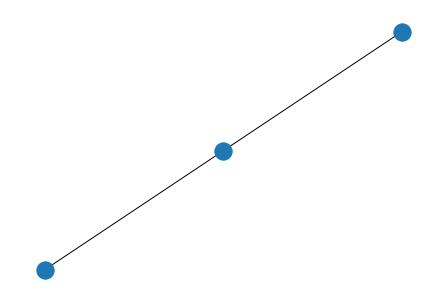

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
g = to_networkx(data, to_undirected=True)
nx.draw(g)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(Data.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, Data.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

TypeError: ignored

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device) 

AttributeError: ignored

In [ ]:
u1_df = df2.drop(['user_key','song_key'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
u1_df.head(15)

,playlist_key,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,00's,00s,00s party girl soundtrack,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,0,0,0,0,1,0,12,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,4,0,...,0,0,1,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,0,7,0,...,1,0,2,0,1,0,0,0,1,0
4,4,0,0,0,0,0,0,1,7,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
node_features=u1_df.drop(['playlist_key'], axis=1)
node_features.head(15) 

,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,00's,00s,00s party girl soundtrack,010s,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,0,0,0,1,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,4,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,7,0,0,...,1,0,2,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,7,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = node_features.to_numpy()
x.shape # [num_nodes x num_features]

(14, 3102)

In [ ]:
u1_df.head(15)

,playlist_key,-2,-3,-4,-5,-chill-trip-lounge-down-,-favorites-,00's,00s,00s party girl soundtrack,...,you need to hear this,youth,youtube,yule,yum,z3po like this,zajebiste,zaplovedtracks,zicbouge,ziccool
0,0,0,0,0,0,0,1,0,12,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,4,0,...,0,0,1,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,0,7,0,...,1,0,2,0,1,0,0,0,1,0
4,4,0,0,0,0,0,0,1,7,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels = u1_df[["playlist_key"]]
labels.head()

,playlist_key
0,0
1,1
2,2
3,3
4,4


In [ ]:
# Convert to numpy
y = labels.to_numpy()
y.shape # [num_nodes, 1] --> node regression

(14, 1)

In [ ]:
import networkx as nx
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

# load graph from networkx library
G = nx.karate_club_graph()

# retrieve the labels for each node
labels = np.asarray([G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes]).astype(np.int64)

# create edge index from 
adj = nx.to_scipy_sparse_matrix(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

# using degree as embedding
embeddings = np.array(list(dict(G.degree()).values()))

# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))